# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Phase 2 Milestone 1</p>

Milestones ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Full Time Program Phase 2 khususnya pada Artificial Neural Network.

# Table of Contents

1. Introduction
2. Import Libraries
3. Data Loading
4. Exploratory Data Analysis
5. Data Preprocessing
6. Model Definition
7. Model Training
8. Model Evaluation
9. Model Inference
10. Conclusion


# 1. Introduction

name : Reza Ismail Hasan

Class : HCK - 01

# 2. Import Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout

from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_curve,roc_auc_score,precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from feature_engine.outliers import Winsorizer
pd.options.display.max_columns = None

import pickle
import warnings
warnings.simplefilter('ignore')

np.random.seed(99)
tf.random.set_seed(50)

# 3. Data Loading

In [6]:
df = pd.read_csv('/Users/rezaismail/Hacktiv8/Phase 2/Assignment/M1/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df_copy = df.copy()

In [10]:
df_copy.TotalCharges = pd.to_numeric(df_copy.TotalCharges, errors='coerce')

In [11]:
df_copy.isnull().sum()  

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
# Check Missing Values for Variable `TotalCharges`

dna = df_copy[df_copy.TotalCharges.isnull()]
dna

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [14]:
df.iloc[dna.index]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [15]:
df_copy.dropna(inplace = True)

In [16]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


### Inference Set

In [17]:
data_inf = df_copy.sample(5, random_state=50)
df_copy.drop(data_inf.index, inplace=True)

# 4. Exploratory Data Analysis


In [18]:
df_new = df_copy.drop(['Churn','customerID'],axis =1)
target = df_copy['Churn']

In [19]:
cat = df_new.select_dtypes(exclude='float64')
num = df_new.select_dtypes(include='float64')
cat_cols = cat.columns.tolist() 
num_cols = num.columns.tolist()

target_col = ['Churn']

print("Categorical variables are:",cat_cols)
print("-------------------------------------")
print("Numerical variables are:",num_cols)
print("-------------------------------------")
print("Target variables are:",target_col)

Categorical variables are: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
-------------------------------------
Numerical variables are: ['MonthlyCharges', 'TotalCharges']
-------------------------------------
Target variables are: ['Churn']


<AxesSubplot:xlabel='Churn', ylabel='count'>

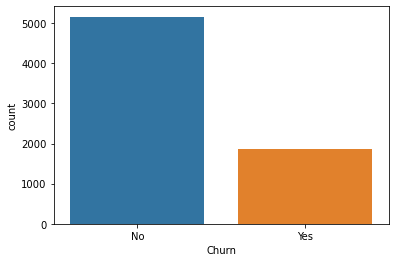

In [20]:
sns.countplot(x ='Churn', data = df_copy)

Pada kolom target terdapat jumlah yang tidak seimbang pada label `yes` dan `no`. Namun jumlahnya masih tidak terlalu signifikan.

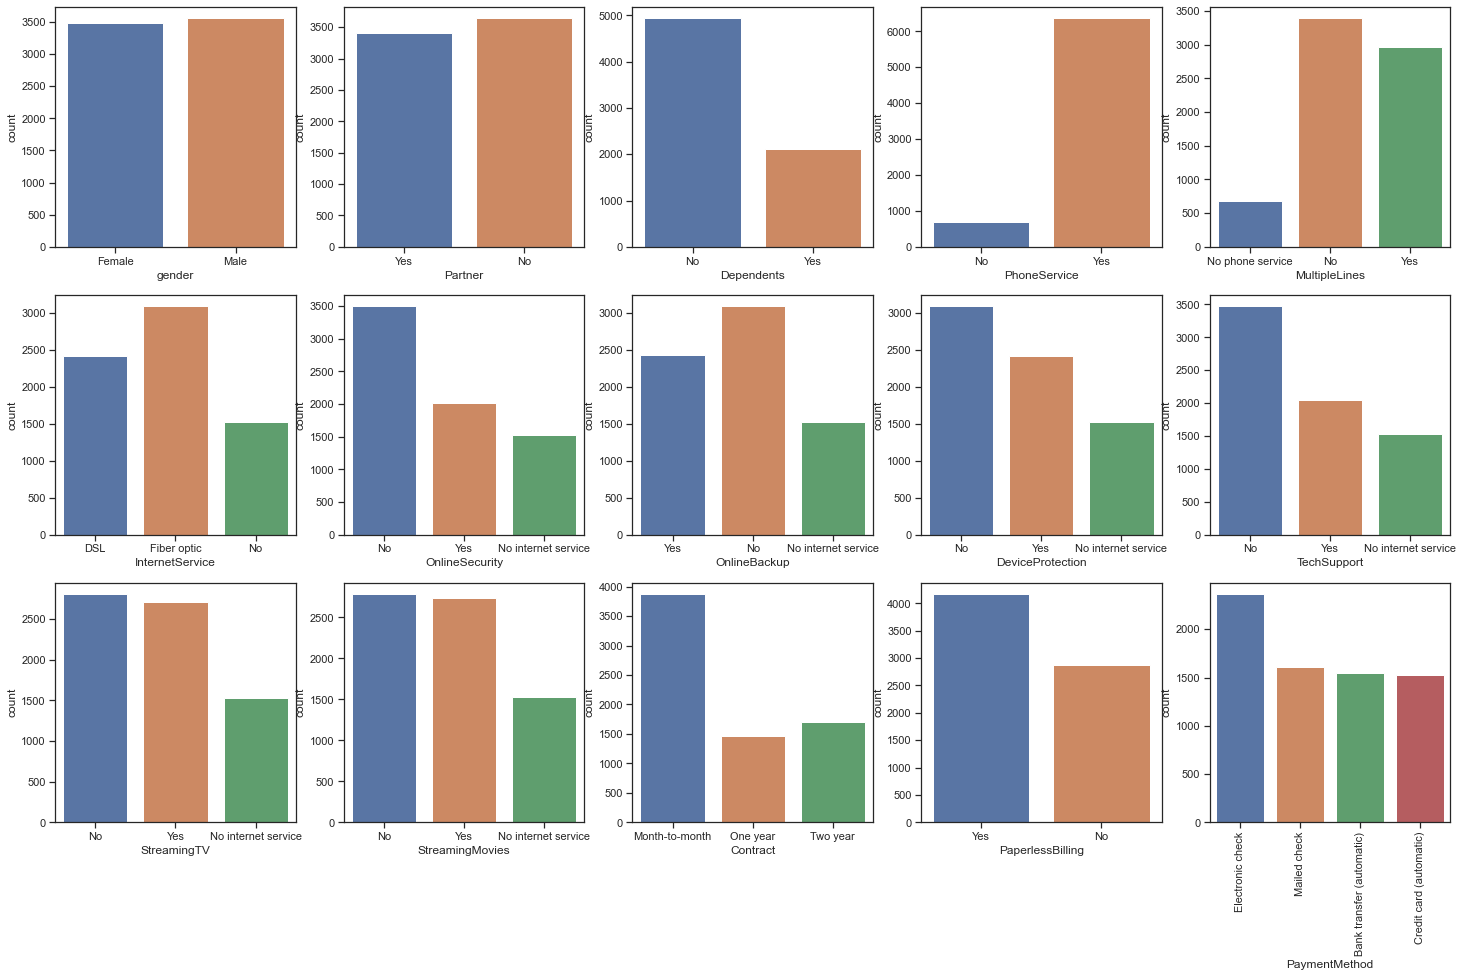

In [21]:
sns.set(style="ticks", color_codes=True)
fig, axes = plt.subplots(nrows = 3,ncols = 5,figsize = (25,15))
sns.countplot(x = "gender", data = df, ax=axes[0][0])
sns.countplot(x = "Partner", data = df, ax=axes[0][1])
sns.countplot(x = "Dependents", data = df, ax=axes[0][2])
sns.countplot(x = "PhoneService", data = df, ax=axes[0][3])
sns.countplot(x = "MultipleLines", data = df, ax=axes[0][4])
sns.countplot(x = "InternetService", data = df, ax=axes[1][0])
sns.countplot(x = "OnlineSecurity", data = df, ax=axes[1][1])
sns.countplot(x = "OnlineBackup", data = df, ax=axes[1][2])
sns.countplot(x = "DeviceProtection", data = df, ax=axes[1][3])
sns.countplot(x = "TechSupport", data = df, ax=axes[1][4])
sns.countplot(x = "StreamingTV", data = df, ax=axes[2][0])
sns.countplot(x = "StreamingMovies", data = df, ax=axes[2][1])
sns.countplot(x = "Contract", data = df, ax=axes[2][2])
sns.countplot(x = "PaperlessBilling", data = df, ax=axes[2][3])
ax = sns.countplot(x = "PaymentMethod", data = df, ax=axes[2][4])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show(fig)

In [22]:
# defining a function to determine outlier existence

def outlier_analysis(df,col):
  skewness = df[col].skew()
  if skewness>=-0.5 and skewness<=0.5:
    upper = df[col].mean() + 3*df[col].std()
    lower = df[col].mean() - 3*df[col].std()
  else:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q1 + 1.5*IQR
    lower = Q3 - 1.5*IQR
  
  no_outliers = df[(df[col]>=lower) & (df[col]<=upper)]
  outliers = df[(df[col]<lower) | (df[col]>upper)]

  return outliers,no_outliers, upper, lower

# defining a function to plot the distribution of data
def plot_numerical(df, feature):
    fig, axes = plt.subplots(len(feature),2, figsize=(12, 9))
    x = 0
    for c, ax in zip(feature, axes):
        skew = df[c].skew()
        out,no_out, up, low = outlier_analysis(df,feature[x])
        p_out = len(out)*100/len(df)
        
        _ = sns.histplot(x=df[c], ax=ax[0], bins=50)
        ax[0].set_title(f'Distribution of {c} (skewness = {skew:.3f})')
        
        _ = sns.boxplot(x=df[c], ax=ax[1])
        ax[1].set_title(f'''Boxplot of {c} with Outlier Percentage : {p_out:.3f}%''')
        x += 1

    plt.tight_layout()

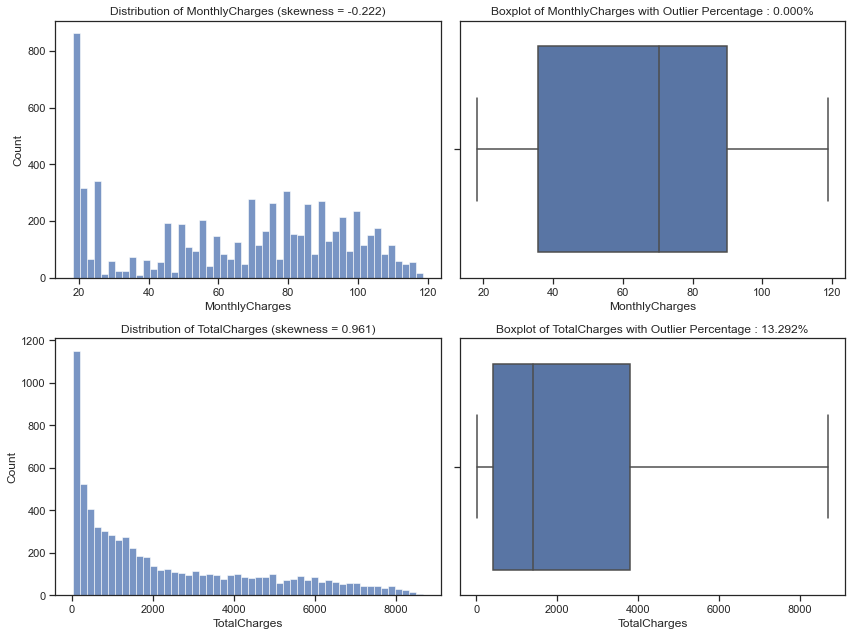

In [23]:
plot_numerical(df_new, num_cols)

Pesebaran nilai monthly charges menunjukan distribusi normal dengan skewness -0.222 sedangkan total charge terdistribusi tidak normal dengan skewness 0.96 sehingga pada tahapan data preprocessing akan dilakaukan perlakuan yang berbeda antara kedua data tersebut

# 5. Data Preprocessing

In [24]:
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [25]:
num_cols

['MonthlyCharges', 'TotalCharges']

In [26]:
norm_num_cols = ['MonthlyCharges']
skew_num_cols = ['TotalCharges']

### Splitting Dataset

In [27]:
x_train_full, x_test,  y_train_full, y_test = train_test_split(df_new,
                                                               target,
                                                               shuffle=True, test_size=0.2,
                                                               stratify= target
                                                               )

x_train, x_val, y_train, y_val = train_test_split(x_train_full,
                                                  y_train_full,
                                                  shuffle=True, test_size=0.2)

In [28]:
print('Train Size : ', x_train.shape)
print('Test Size  : ', x_test.shape)
print('Val Size  : ', x_val.shape)

Train Size :  (4496, 19)
Test Size  :  (1406, 19)
Val Size  :  (1125, 19)


In [29]:
y_train.value_counts()

No     3304
Yes    1192
Name: Churn, dtype: int64

### Pipeline

Pada tahapan preprocessing data saya lakukan dengan pipeline dengan membagi data menjadi 3 bagian yaitu :
1. data numerik yang terdistribusi normal
2. data numerik yang terdistribusi tidak normal
3. data kategorikal

In [30]:
norm_num_pipeline = Pipeline([
                        ('outliers', Winsorizer(capping_method='gaussian',
                        tail = 'both',
                        fold=3,
                        variables= norm_num_cols)),
                        ('scaler', StandardScaler())
                        ])
skew_num_pipeline = Pipeline([
                        ('outliers', Winsorizer(capping_method='iqr',
                        tail = 'both',
                        fold=1.5,
                        variables= skew_num_cols)),
                        ('scaler', MinMaxScaler())
                        ])

cat_pipeline = Pipeline([('encoding', OrdinalEncoder())
                        ])

preprocess = ColumnTransformer(transformers=[
    ('norm_num', norm_num_pipeline, norm_num_cols),
    ('skew_num', skew_num_pipeline, skew_num_cols),
    ('cat', cat_pipeline, cat_cols)
    
],verbose=True)


In [31]:
X_train = preprocess.fit_transform(x_train)
X_test = preprocess.transform(x_test)
X_val = preprocess.transform(x_val)

[ColumnTransformer] ...... (1 of 3) Processing norm_num, total=   0.0s
[ColumnTransformer] ...... (2 of 3) Processing skew_num, total=   0.0s
[ColumnTransformer] ........... (3 of 3) Processing cat, total=   0.0s


In [32]:
y_train = np.where(y_train == "Yes", 1, 0)
y_test = np.where(y_test == "Yes", 1, 0)
y_val = np.where(y_val == "Yes", 1, 0)

In [33]:
# save pipeline preprocess
pickle.dump(preprocess, open('preprocess.pkl', 'wb'))

### Tensorflow Pipeline

In [34]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(32)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.batch(32)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.batch(32)

2022-10-14 06:34:35.559598: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# 6. Model Definition

**Penentuan jumlah neuron di hidden layer**

$𝑁_ℎ=\frac{𝑁𝑠}{(\alpha∗(𝑁𝑖+𝑁𝑜))}$

𝑁𝑖 = number of input neurons.

𝑁𝑜 = number of output neurons.

𝑁𝑠 = number of samples in training data set.

𝛼 = an arbitrary scaling factor usually 2-10.

Referensi: https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

In [35]:
alp = 10
inp = X_train.shape[1]
out = 1
hid = int(len(X_train)/(alp*(inp+out)))

print(f'Jumlah neuron pada hidden layer : {hid}')

Jumlah neuron pada hidden layer : 22


### Sequential

In [36]:
n_neuron1 = (22, 11) 
# Arsitektur Model_Sequential
n_feature = X_train.shape[1]
model_seq = Sequential()
model_seq.add(Input(shape=(n_feature, ))) # INPUT LAYER

for n in n_neuron1:  # HIDDEN LAYER
    model_seq.add(Dense(n, activation='relu'))

model_seq.add(Dense(1, activation='sigmoid'))  # OUTPUT LAYER

#atur optimizernya
opt = tf.keras.optimizers.Adam(learning_rate=0.001) 
model_seq.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [37]:
model_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 22)                440       
                                                                 
 dense_1 (Dense)             (None, 11)                253       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 705
Trainable params: 705
Non-trainable params: 0
_________________________________________________________________


### Functional

In [38]:
n_neuron2 = (22, 11) # jumlah neuron di hidden layer adalah 40,20,10 

# Arsitektur Model_Functional
data_in = Input(shape=(n_feature, )) # INPUT LAYER
hidden_n = data_in
for n in n_neuron2: # HIDDEN LAYER
    hidden_n = Dense(n, activation='relu')(hidden_n)
data_out = Dense(1, activation='sigmoid')(hidden_n) 

model_func = Model(inputs=data_in, outputs=data_out)

# Compile Model_Functional
model_func.compile(
    loss='binary_crossentropy',
    optimizer=opt, 
    metrics=['accuracy']
)

In [39]:
model_func.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 19)]              0         
                                                                 
 dense_3 (Dense)             (None, 22)                440       
                                                                 
 dense_4 (Dense)             (None, 11)                253       
                                                                 
 dense_5 (Dense)             (None, 1)                 12        
                                                                 
Total params: 705
Trainable params: 705
Non-trainable params: 0
_________________________________________________________________


# 7. Model Training

### Sequential

In [40]:
history=model_seq.fit(X_train, y_train, validation_data=(X_val,y_val), batch_size = 32, epochs = 50)

Epoch 1/50
141/141 [==============================] - 2s 5ms/step - loss: 0.6298 - accuracy: 0.7198 - val_loss: 0.4709 - val_accuracy: 0.7840
Epoch 2/50
141/141 [==============================] - 0s 3ms/step - loss: 0.4556 - accuracy: 0.7889 - val_loss: 0.4380 - val_accuracy: 0.8009
Epoch 3/50
141/141 [==============================] - 0s 3ms/step - loss: 0.4328 - accuracy: 0.7992 - val_loss: 0.4237 - val_accuracy: 0.7982
Epoch 4/50
141/141 [==============================] - 0s 3ms/step - loss: 0.4232 - accuracy: 0.8018 - val_loss: 0.4220 - val_accuracy: 0.8018
Epoch 5/50
141/141 [==============================] - 0s 3ms/step - loss: 0.4143 - accuracy: 0.8056 - val_loss: 0.4224 - val_accuracy: 0.8053
Epoch 6/50
141/141 [==============================] - 0s 3ms/step - loss: 0.4109 - accuracy: 0.8054 - val_loss: 0.4163 - val_accuracy: 0.8036
Epoch 7/50
141/141 [==============================] - 0s 3ms/step - loss: 0.4108 - accuracy: 0.8036 - val_loss: 0.4180 - val_accuracy: 0.8071
Epoch 

### Functional

In [41]:
history2=model_func.fit(X_train, y_train, validation_data=(X_val,y_val), batch_size = 32, epochs = 50)

Epoch 1/50
141/141 [==============================] - 2s 5ms/step - loss: 0.5054 - accuracy: 0.7587 - val_loss: 0.4265 - val_accuracy: 0.7973
Epoch 2/50
141/141 [==============================] - 0s 3ms/step - loss: 0.4207 - accuracy: 0.8054 - val_loss: 0.4204 - val_accuracy: 0.8009
Epoch 3/50
141/141 [==============================] - 1s 6ms/step - loss: 0.4133 - accuracy: 0.8076 - val_loss: 0.4201 - val_accuracy: 0.8000
Epoch 4/50
141/141 [==============================] - 0s 3ms/step - loss: 0.4111 - accuracy: 0.8076 - val_loss: 0.4209 - val_accuracy: 0.8027
Epoch 5/50
141/141 [==============================] - 0s 3ms/step - loss: 0.4060 - accuracy: 0.8092 - val_loss: 0.4227 - val_accuracy: 0.7982
Epoch 6/50
141/141 [==============================] - 0s 3ms/step - loss: 0.4045 - accuracy: 0.8094 - val_loss: 0.4201 - val_accuracy: 0.7982
Epoch 7/50
141/141 [==============================] - 0s 3ms/step - loss: 0.4055 - accuracy: 0.8101 - val_loss: 0.4198 - val_accuracy: 0.8000
Epoch 

# 8. Model Evaluation

### Sequential

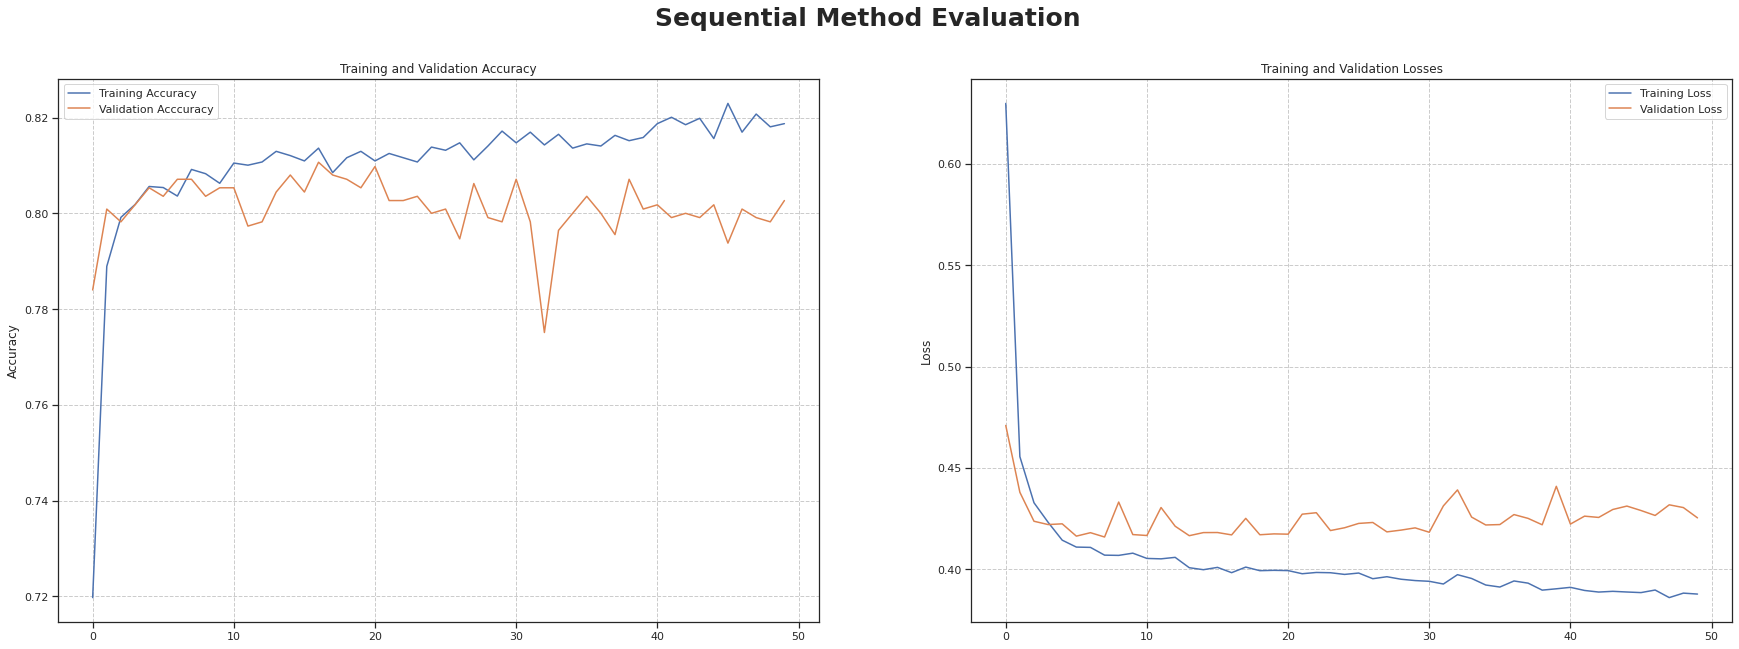

In [42]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Sequential Method Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history.history['accuracy'],label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

In [43]:
val_results = model_seq.evaluate(X_test,y_test, verbose=0)
print(f'Validation Loss     : {val_results[0]:.4f}')
print(f'Validation Accuracy : {val_results[1]:.4f}')

Validation Loss     : 0.4488
Validation Accuracy : 0.7866


44/44 [==============================] - 0s 2ms/step
[[873 159]
 [157 217]]


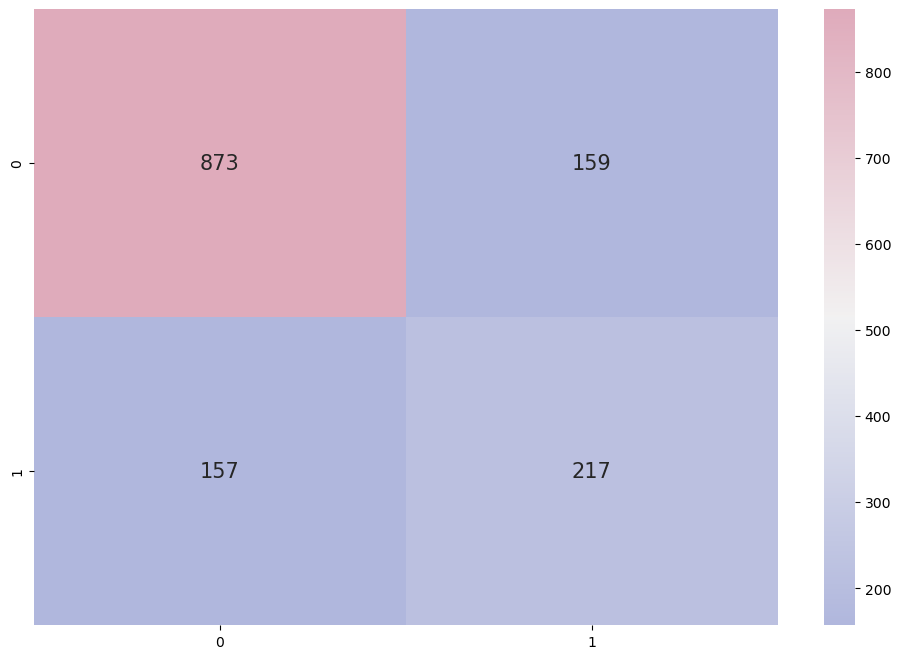

In [44]:
# predict probabilities
y_pred = model_seq.predict(X_test)
# keep probabilities for the positive outcome only
y_pred = (y_pred > 0.4)

# confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
##persentase
# sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15});
sns.heatmap(cf_matrix, cmap = cmap1, annot = True, annot_kws = {'size':15}, fmt='g');

In [45]:
print(f'model 1 accuracy score: {accuracy_score(y_test, y_pred>.5)}')

model 1 accuracy score: 0.7752489331436699


In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1032
           1       0.58      0.58      0.58       374

    accuracy                           0.78      1406
   macro avg       0.71      0.71      0.71      1406
weighted avg       0.78      0.78      0.78      1406



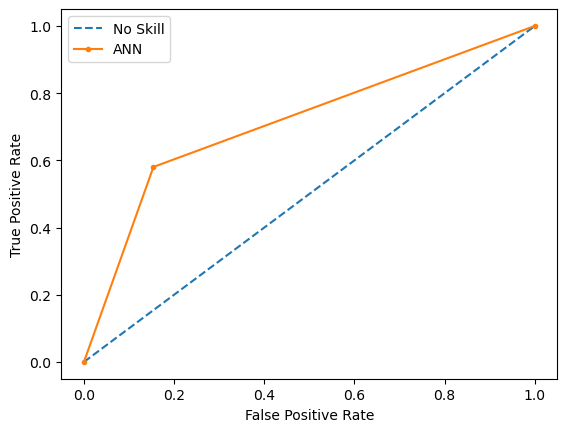

AUC score: 0.7130720681507274


In [47]:
# calculate roc curves & auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test,y_pred)

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='ANN')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()
print(f'AUC score: {auc}')

### Functional

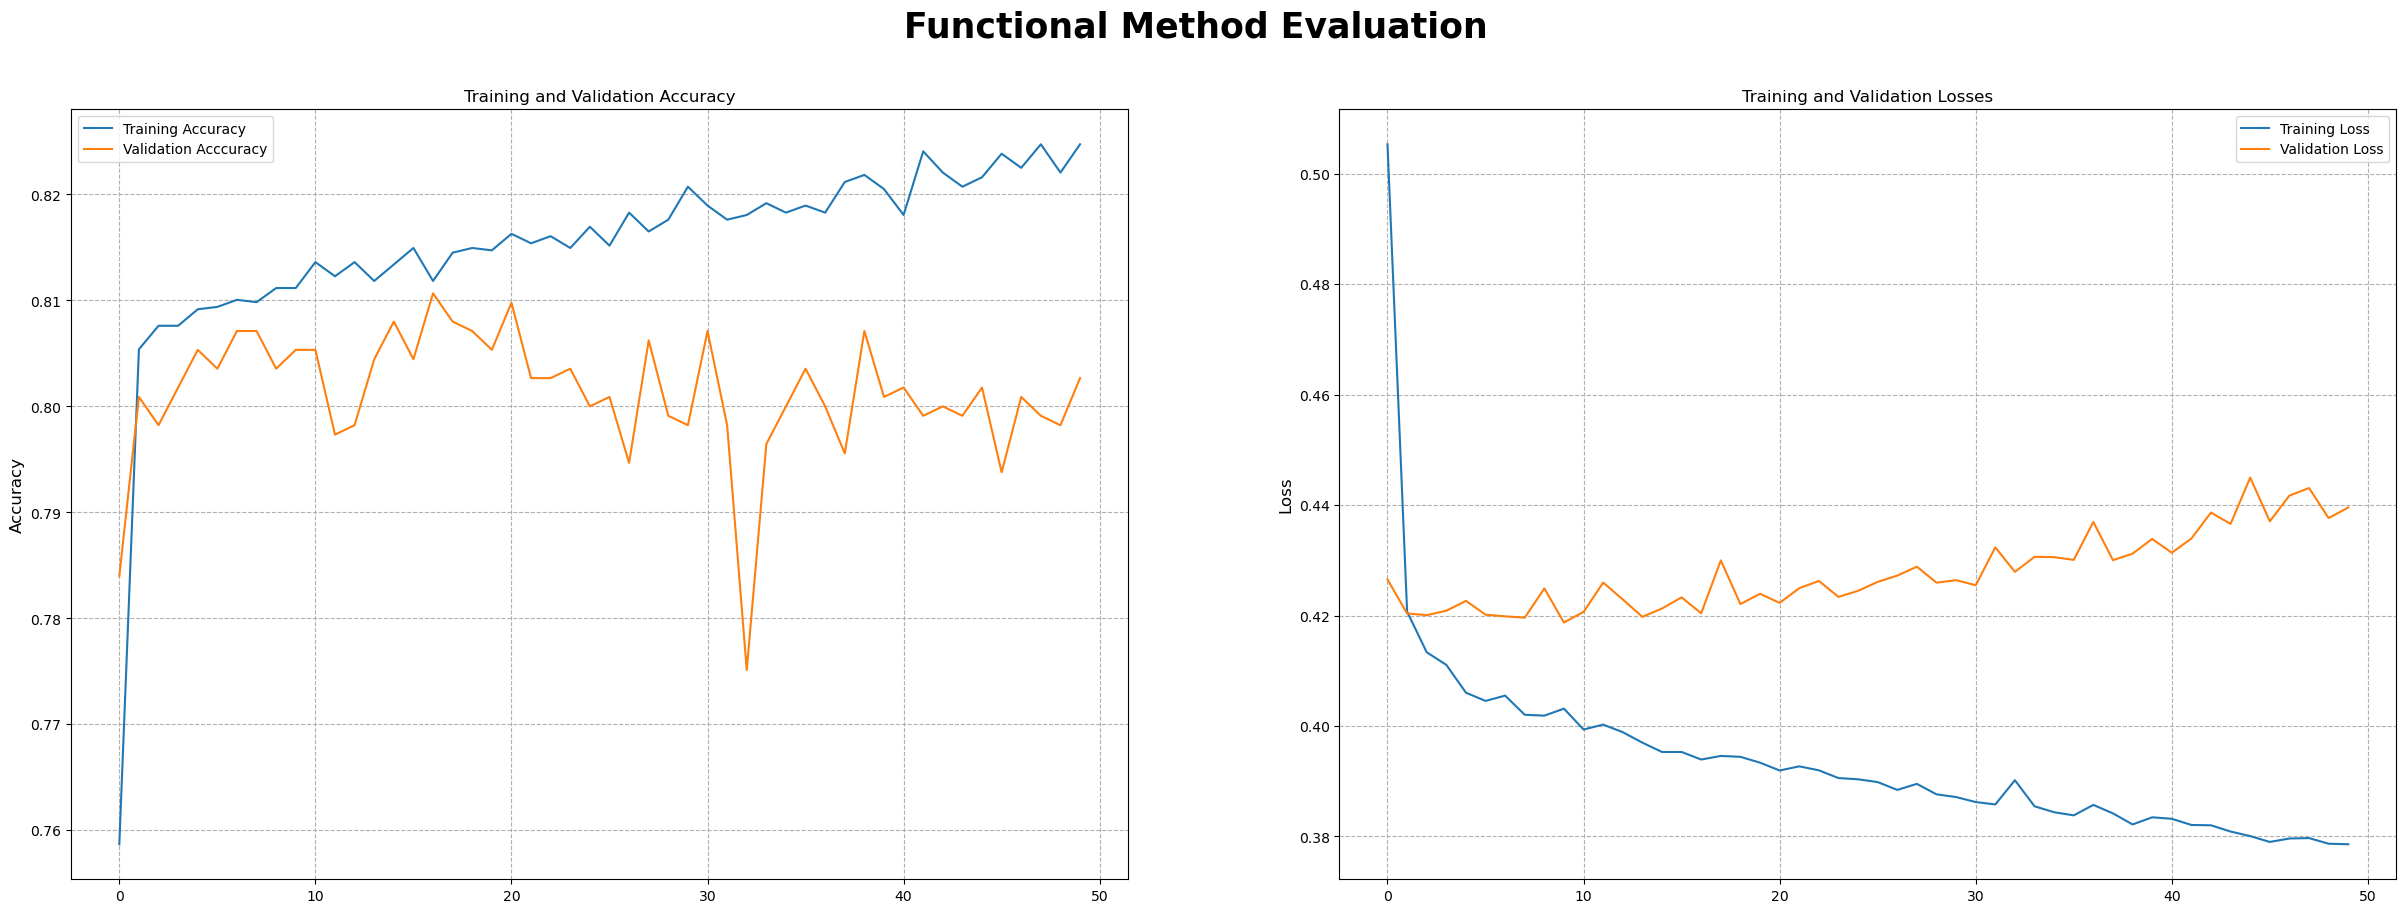

In [48]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Functional Method Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history2.history['accuracy'],label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history2.history['loss'], label="Training Loss")
plt.plot(history2.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

44/44 [==============================] - 0s 2ms/step
[[875 157]
 [171 203]]


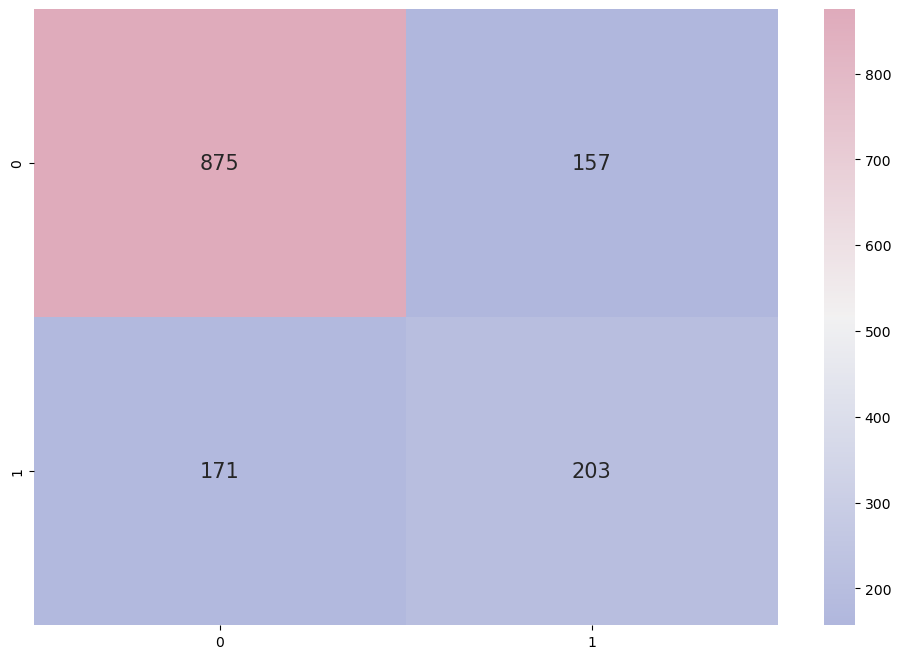

In [49]:
# predict probabilities
y_pred1 = model_func.predict(X_test)
# keep probabilities for the positive outcome only
y_pred1 = (y_pred1 > 0.4)

# confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred1)
print(cf_matrix)
##persentase
# sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15});
sns.heatmap(cf_matrix, cmap = cmap1, annot = True, annot_kws = {'size':15}, fmt='g');

In [50]:
print(f'model 2 accuracy score: {accuracy_score(y_test, y_pred1>.5)}')

model 2 accuracy score: 0.7667140825035562


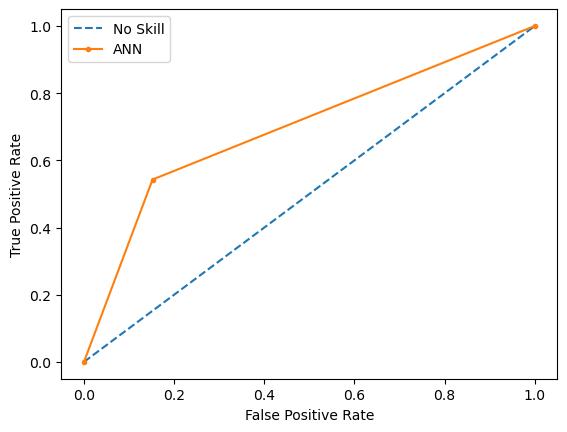

AUC score: 0.6953244828586825


In [51]:
# calculate roc curves & auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
auc = roc_auc_score(y_test,y_pred1)

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='ANN')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()
print(f'AUC score: {auc}')

In [52]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1032
           1       0.56      0.54      0.55       374

    accuracy                           0.77      1406
   macro avg       0.70      0.70      0.70      1406
weighted avg       0.76      0.77      0.77      1406



## Model Improvement

### Sequential Model (Improved)

In [53]:
model_seqim = tf.keras.models.Sequential()
model_seqim.add(tf.keras.layers.Dense(inp, activation='elu', input_shape=(X_train.shape[1],), kernel_initializer='HeNormal',kernel_regularizer='l2')) #input layer
model_seqim.add(tf.keras.layers.BatchNormalization())
model_seqim.add(tf.keras.layers.Dense(25, activation='elu')) #hidden layer
model_seqim.add(tf.keras.layers.BatchNormalization())
model_seqim.add(tf.keras.layers.Dense(15, activation='elu'))
model_seqim.add(tf.keras.layers.Dropout(0.1))
model_seqim.add(tf.keras.layers.Dense(out, activation='sigmoid')) #output layer

In [54]:
model_seqim.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 19)                380       
                                                                 
 batch_normalization (BatchN  (None, 19)               76        
 ormalization)                                                   
                                                                 
 dense_7 (Dense)             (None, 25)                500       
                                                                 
 batch_normalization_1 (Batc  (None, 25)               100       
 hNormalization)                                                 
                                                                 
 dense_8 (Dense)             (None, 15)                390       
                                                                 
 dropout (Dropout)           (None, 15)               

In [55]:
model_seqim.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),metrics='accuracy')

In [56]:
history3 = model_seqim.fit(train_dataset, epochs=55, batch_size=32, validation_data=(val_dataset))

Epoch 1/55
141/141 [==============================] - 2s 5ms/step - loss: 1.2425 - accuracy: 0.3714 - val_loss: 1.0143 - val_accuracy: 0.6133
Epoch 2/55
141/141 [==============================] - 0s 3ms/step - loss: 0.9992 - accuracy: 0.6001 - val_loss: 0.9364 - val_accuracy: 0.6613
Epoch 3/55
141/141 [==============================] - 0s 3ms/step - loss: 0.9061 - accuracy: 0.6862 - val_loss: 0.8879 - val_accuracy: 0.7031
Epoch 4/55
141/141 [==============================] - 1s 5ms/step - loss: 0.8486 - accuracy: 0.7309 - val_loss: 0.8415 - val_accuracy: 0.7378
Epoch 5/55
141/141 [==============================] - 1s 4ms/step - loss: 0.8039 - accuracy: 0.7607 - val_loss: 0.7960 - val_accuracy: 0.7680
Epoch 6/55
141/141 [==============================] - 1s 4ms/step - loss: 0.7655 - accuracy: 0.7838 - val_loss: 0.7599 - val_accuracy: 0.7698
Epoch 7/55
141/141 [==============================] - 0s 3ms/step - loss: 0.7397 - accuracy: 0.7774 - val_loss: 0.7285 - val_accuracy: 0.7760
Epoch 

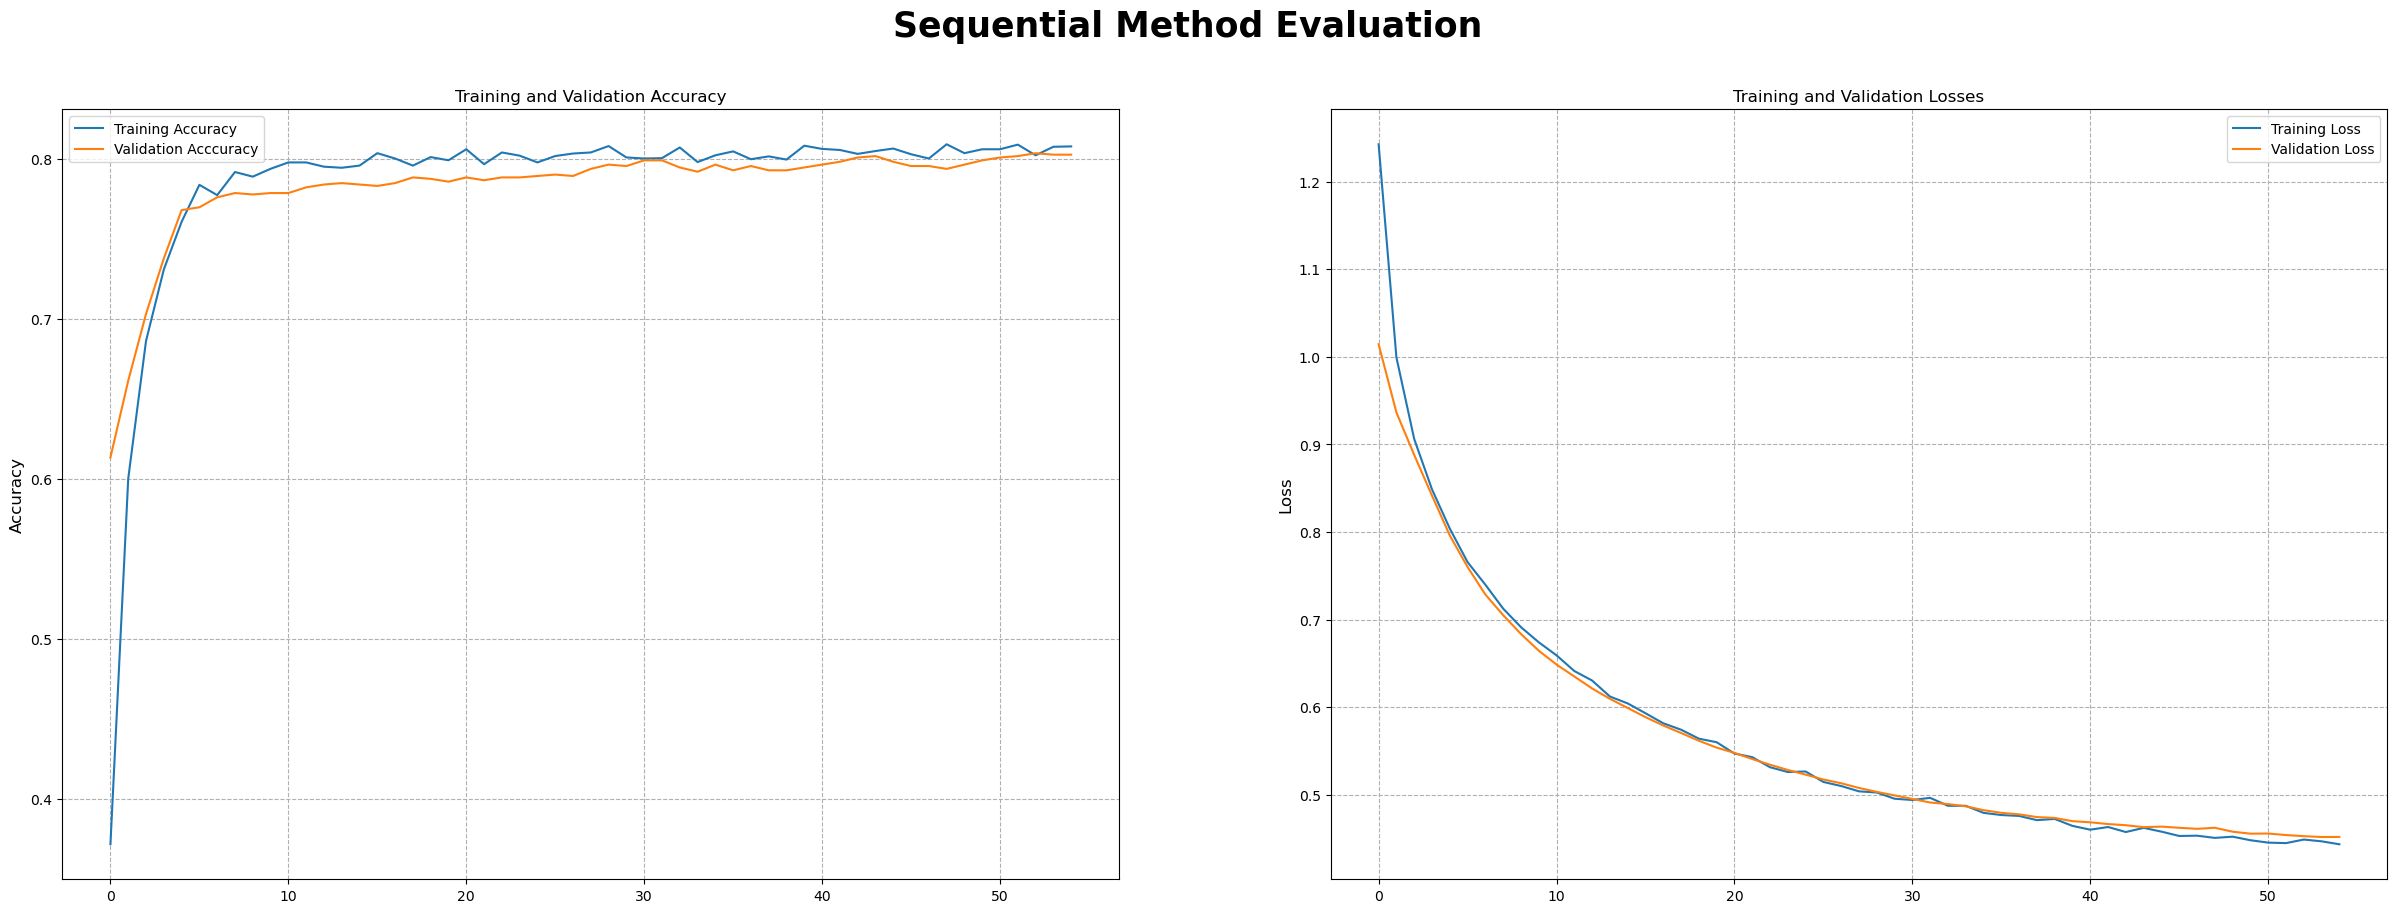

In [57]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Sequential Method Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history3.history['accuracy'],label="Training Accuracy")
plt.plot(history3.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history3.history['loss'], label="Training Loss")
plt.plot(history3.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

44/44 [==============================] - 0s 2ms/step
[[875 157]
 [171 203]]
========== TEST ==========
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1032
           1       0.56      0.59      0.58       374

    accuracy                           0.77      1406
   macro avg       0.71      0.71      0.71      1406
weighted avg       0.77      0.77      0.77      1406



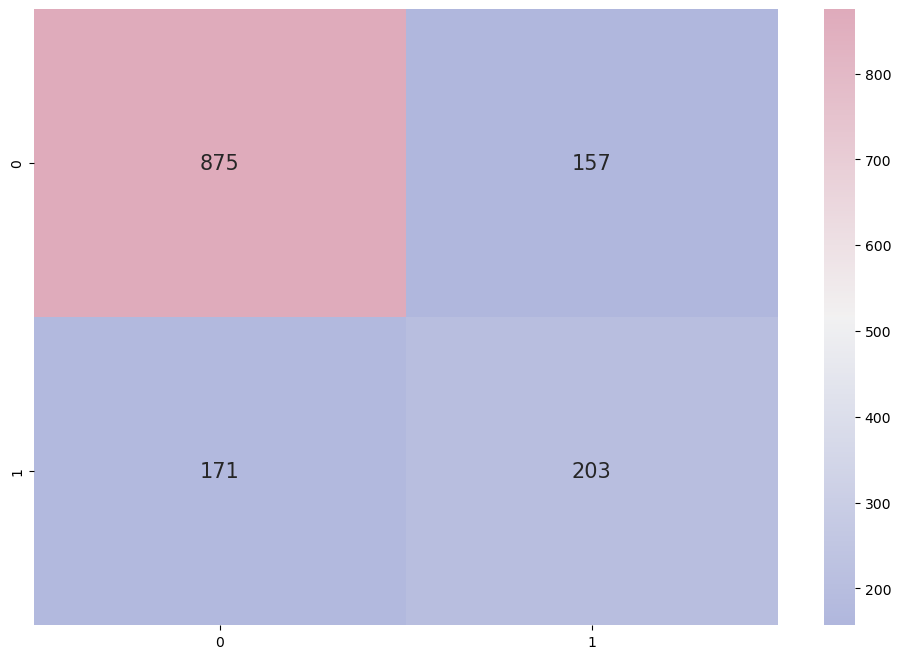

In [58]:
# predict probabilities
y_pred3 = model_seqim.predict(X_test)
# keep probabilities for the positive outcome only
y_pred3 = (y_pred3 > 0.4)

# confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred1)
print(cf_matrix)
##persentase
# sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15});
sns.heatmap(cf_matrix, cmap = cmap1, annot = True, annot_kws = {'size':15}, fmt='g');


# classification report
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred3, zero_division=0))

### Functional Model (improved)

In [59]:
input_lyr = tf.keras.layers.Input(shape=(X_train.shape[1],))
layers = tf.keras.layers.Dense(9, activation='relu',kernel_initializer='HeNormal',kernel_regularizer='l2')(input_lyr)
layers = tf.keras.layers.BatchNormalization()(layers)
layers = tf.keras.layers.Dense(3, activation='relu')(layers)
layers = tf.keras.layers.BatchNormalization()(layers)
layers = tf.keras.layers.Dropout(0.1)(layers)
output = tf.keras.layers.Dense(out, activation='sigmoid')(layers)

model_funcim = tf.keras.models.Model(inputs=input_lyr,outputs=output)

In [60]:
model_funcim.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),metrics='accuracy')

In [81]:
history4 = model_funcim.fit(train_dataset, epochs=80, batch_size=32, validation_data=(val_dataset))

Epoch 1/80
141/141 [==============================] - 1s 7ms/step - loss: 0.4150 - accuracy: 0.8060 - val_loss: 0.4381 - val_accuracy: 0.8027
Epoch 2/80
141/141 [==============================] - 1s 9ms/step - loss: 0.4193 - accuracy: 0.8040 - val_loss: 0.4378 - val_accuracy: 0.8018
Epoch 3/80
141/141 [==============================] - 1s 6ms/step - loss: 0.4242 - accuracy: 0.8032 - val_loss: 0.4377 - val_accuracy: 0.7991
Epoch 4/80
141/141 [==============================] - 1s 7ms/step - loss: 0.4163 - accuracy: 0.8109 - val_loss: 0.4348 - val_accuracy: 0.8000
Epoch 5/80
141/141 [==============================] - 1s 8ms/step - loss: 0.4199 - accuracy: 0.8069 - val_loss: 0.4376 - val_accuracy: 0.7991
Epoch 6/80
141/141 [==============================] - 1s 7ms/step - loss: 0.4217 - accuracy: 0.8029 - val_loss: 0.4364 - val_accuracy: 0.8000
Epoch 7/80
141/141 [==============================] - 1s 7ms/step - loss: 0.4202 - accuracy: 0.8103 - val_loss: 0.4358 - val_accuracy: 0.8018
Epoch 

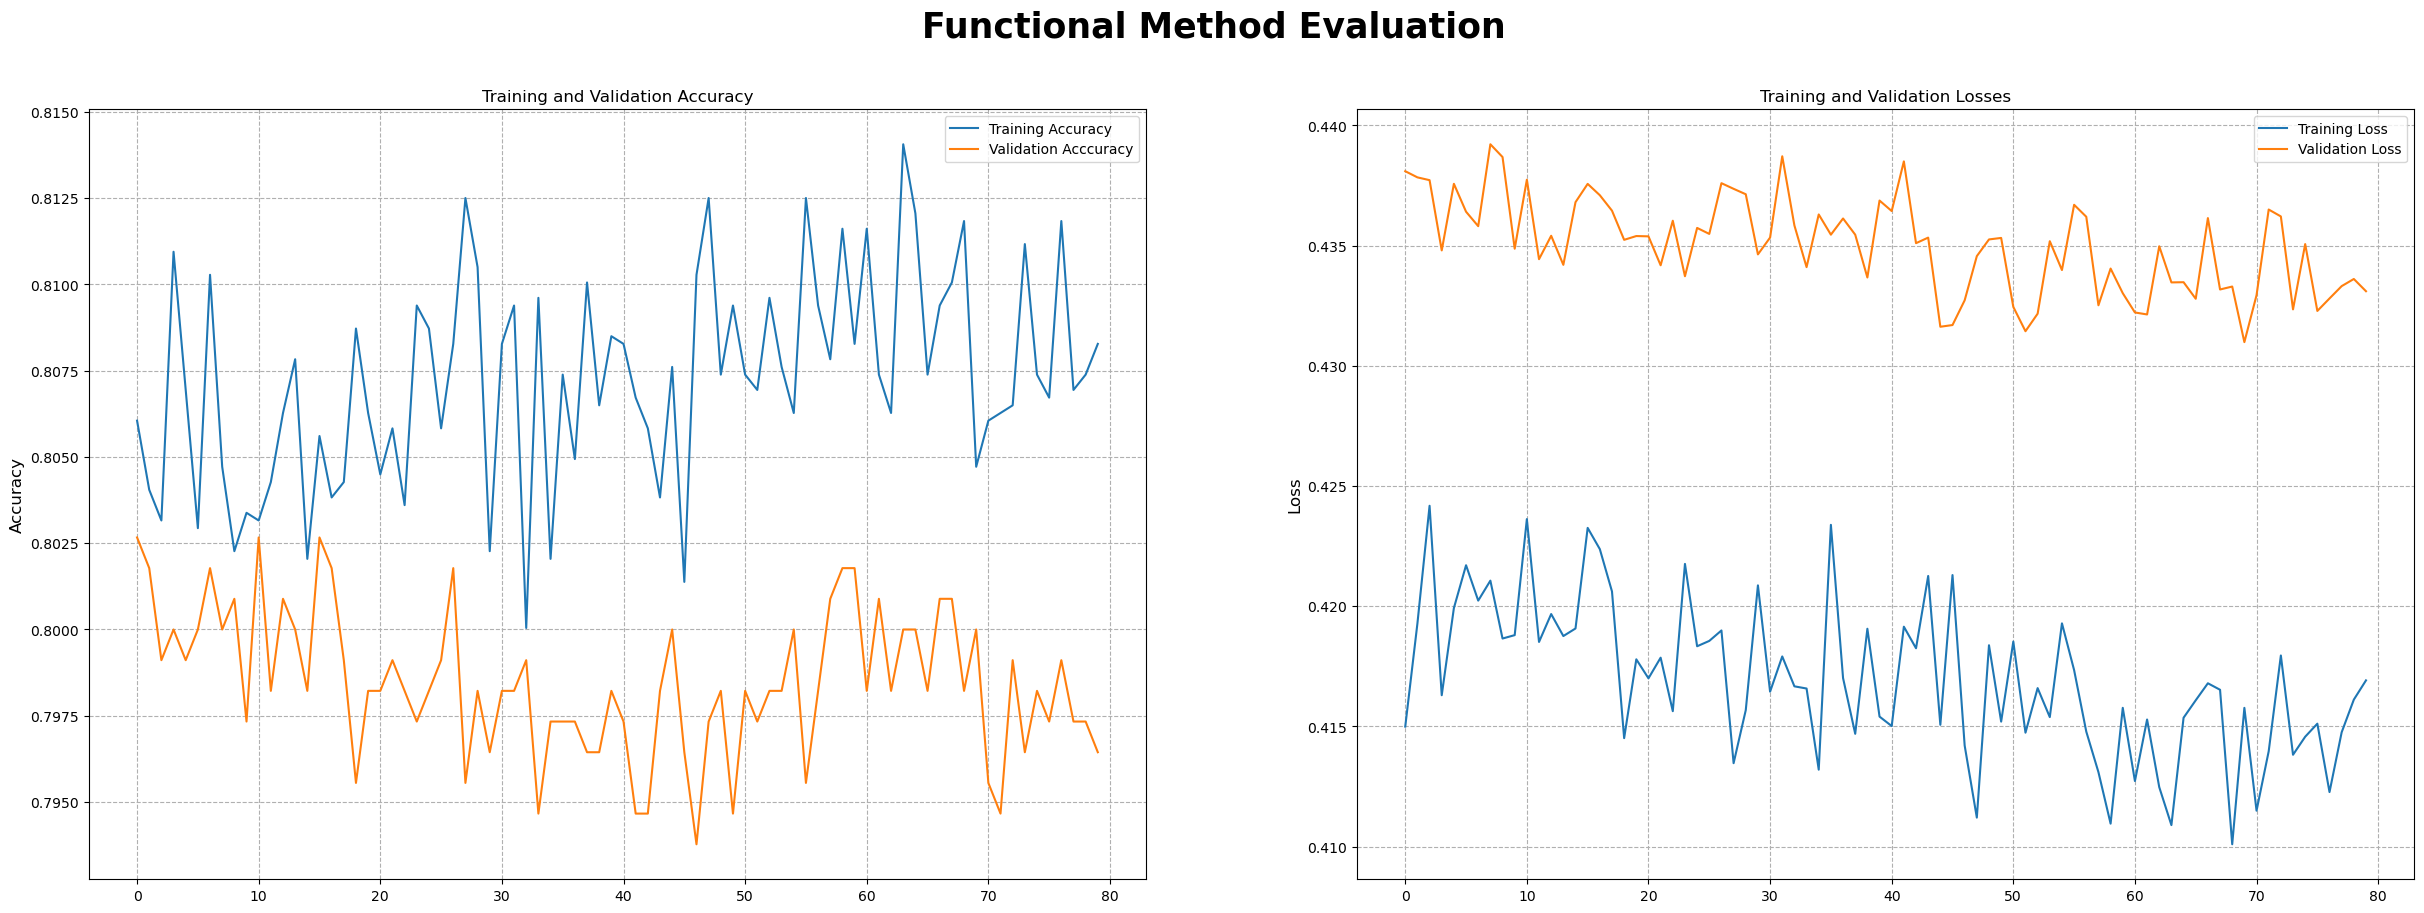

In [82]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Functional Method Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history4.history['accuracy'],label="Training Accuracy")
plt.plot(history4.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history4.history['loss'], label="Training Loss")
plt.plot(history4.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

44/44 [==============================] - 0s 4ms/step
[[917 115]
 [197 177]]
========== TEST ==========
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1032
           1       0.61      0.47      0.53       374

    accuracy                           0.78      1406
   macro avg       0.71      0.68      0.69      1406
weighted avg       0.77      0.78      0.77      1406



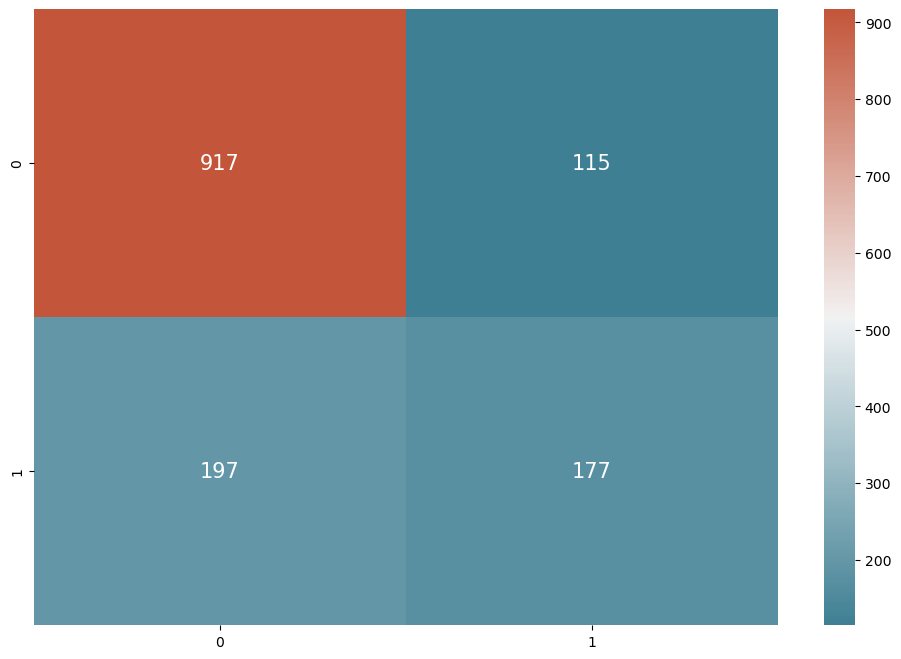

In [85]:
# predict probabilities
y_pred4 = model_funcim.predict(X_test)
# keep probabilities for the positive outcome only
y_pred4 = (y_pred4 > 0.5)

# confusion matrix
cmap1 = sns.diverging_palette(220,20, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred4)
print(cf_matrix)
##persentase
# sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15});
sns.heatmap(cf_matrix, cmap = cmap1, annot = True, annot_kws = {'size':15}, fmt='g');


# classification report
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred4, zero_division=0))

Dari grafik ini dapat kita lihat pada epoch sekitar 70 model tampak just fit dengan garis gradient yang stabil sehingga model functional yang sudah dimprove ini akan dipilih menjadi model terbaik untuk memprediksi customer churn.

### Model Saving

In [64]:
model_funcim.save('customer_churn_model')

INFO:tensorflow:Assets written to: customer_churn_model/assets


In [65]:
model_funcim.save('customer_churn_model.h5')

In [66]:
# freeze model
model_funcim.trainable = False

# 9. Model Inference

In [67]:
data_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4460,0365-GXEZS,Male,0,Yes,No,18,Yes,No,Fiber optic,No,No,Yes,Yes,No,No,Month-to-month,No,Electronic check,78.20,1468.75,No
733,7564-GHCVB,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Two year,No,Bank transfer (automatic),79.05,5730.70,No
5514,0623-GDISB,Female,0,No,No,1,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),48.45,48.45,No
5864,5093-FEGLU,Female,0,Yes,No,47,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.65,921.55,No
916,3956-CJUST,Female,1,No,No,23,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.40,1643.55,No


In [68]:
data_inf_final = preprocess.transform(data_inf)

In [69]:
pred_inf = model_funcim.predict(data_inf_final)
pred_inf = np.where(pred_inf == 1, 'yes', 'no')
pred_inf_df = pd.DataFrame(pred_inf, columns=['Predicted Churn'])
pred_inf_df

1/1 [==============================] - 0s 42ms/step


,Predicted Churn
0,no
1,no
2,no
3,no
4,no


In [70]:
data_inf.reset_index(inplace=True)

In [71]:
# Concate between Inference-Set and targets's Prediction 
pd.concat([data_inf, pred_inf_df], axis=1)

,index,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Predicted Churn
0,4460,0365-GXEZS,Male,0,Yes,No,18,Yes,No,Fiber optic,No,No,Yes,Yes,No,No,Month-to-month,No,Electronic check,78.20,1468.75,No,no
1,733,7564-GHCVB,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Two year,No,Bank transfer (automatic),79.05,5730.70,No,no
2,5514,0623-GDISB,Female,0,No,No,1,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),48.45,48.45,No,no
3,5864,5093-FEGLU,Female,0,Yes,No,47,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.65,921.55,No,no
4,916,3956-CJUST,Female,1,No,No,23,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.40,1643.55,No,no


# 10. Conclusion

<AxesSubplot:xlabel='Churn', ylabel='count'>

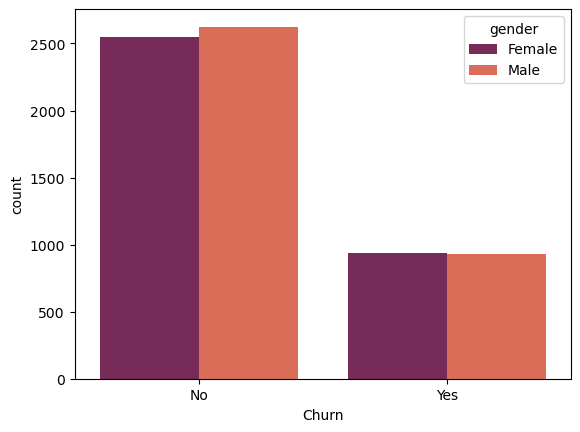

In [91]:
sns.countplot(x='Churn',data=df,hue='gender', palette = 'rocket')